In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import emcee
import corner
import h5py
import os
import os.path as osp
from tqdm.notebook import tqdm
import pandas as pd

# === USER INPUTS ===
backend_dir =  osp.expanduser("~/../../scratch/gpfs/cj1223/DIB/")  # <- replace with your emcee backend file
files = [f for f in os.listdir(backend_dir) if 'run' and 'Cs' and 'bc_run' in f]
files = [f for f in files if 'temp' not in f]
files

['bc_run_SymmetryCs_BCTrue_F1p0_DTrue_FlatFalse_SpecTrue_dTTrue_covFalse_nonlinFalse_tauSlope0p05_update_noalpha.h5',
 'bc_run_SymmetryC2v_BCTrue_F1p0_DFalse_FlatFalse_SpecTrue_dTTrue_covFalse_nonlinFalse_update.h5',
 'bc_run_SymmetryCs_BCTrue_F1p0_DTrue_FlatFalse_SpecFalse_dTTrue_covFalse_nonlinFalse_tauSlope0p05_update.h5',
 'bc_run_Cs_BCTrue_F2p0_DTrue_FlatFalse_SpecFalse_dTTrue_covFalse.h5',
 'bc_run_Cs_BCTrue_F1p0_DTrue_FlatFalse_SpecTrue_dTTrue_covFalse_BC_hierarchy.h5',
 'bc_run_SymmetryC2v_BCFalse_F1p0_DFalse_FlatFalse_SpecTrue_dTTrue_covFalse_nonlinFalse_tauSlope0p05_test.h5',
 'bc_run_SymmetryCs_BCTrue_F1p0_DTrue_FlatFalse_SpecTrue_dTTrue_covFalse_nonlinFalse_tauSlope0p0001_update_notau_noalpha.h5',
 'bc_run_SymmetryCs_BCTrue_F1p0_DTrue_FlatFalse_SpecTrue_dTTrue_covFalse_nonlinFalse_update.h5',
 'bc_run_SymmetryC2v_BCTrue_F1p1_DTrue_FlatFalse_SpecTrue_dTTrue_covFalse_nonlinFalse_test.h5',
 'bc_run_Cs_BCTrue_F1p0_DTrue_FlatFalse_SpecTrue_dTTrue_covFalse.h5',
 'bc_run_SymmetryC

(143,)
(143,)
(143,)
(143,)


<ErrorbarContainer object of 3 artists>

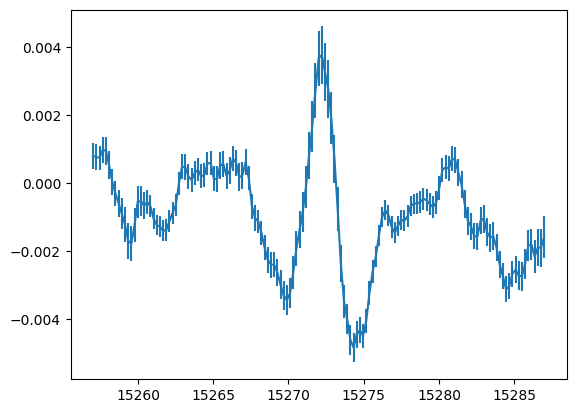

In [21]:
errs0 = h5py.File(osp.expanduser('~/DIB/jackknife_dib.h5'), "r")
measurements = pd.read_csv(osp.expanduser('~/DIB/pca_version.txt'), sep='\s+', names=['wavelength', 'PC1_1', 'PC1_2', 'PC2_1', 'PC2_2'])
data_flux = measurements['PC1_1'].values
data_flux_dT = measurements['PC2_2'].values

# noise_std = errs0['cov'][:, :, 0]
# noise_std_dT = errs0['cov'][:, :, 0]

noise_std = np.sqrt(errs0['var'][:, 0])
noise_std_dT = np.sqrt(errs0['var'][:, 3])
print(noise_std.shape)
print(data_flux.shape)
print(noise_std_dT.shape)
print(data_flux_dT.shape)

plt.errorbar(measurements['wavelength'], data_flux_dT, noise_std_dT)

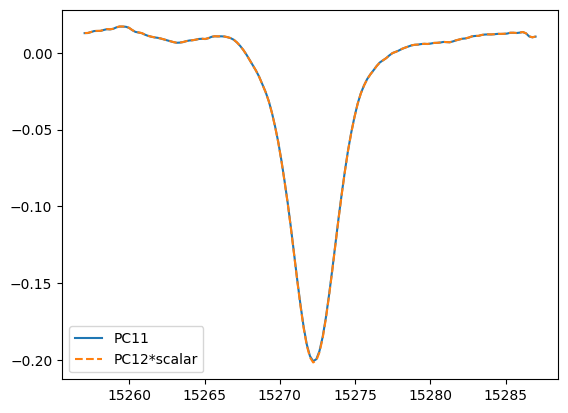

In [37]:
errs0 = h5py.File(osp.expanduser('~/DIB/jackknife_dib.h5'), "r")
measurements = pd.read_csv(osp.expanduser('~/DIB/pca_version.txt'), sep='\s+', names=['wavelength', 'PC1_1', 'PC1_2', 'PC2_1', 'PC2_2'])
data_flux = measurements['PC1_1'].values
data_flux_dT = measurements['PC1_1'].values

noise_std = np.sqrt(errs0['var'][:, 0])
noise_std_dT = np.sqrt(errs0['var'][:, 2])

# plt.errorbar(measurements['wavelength'], data_flux_dT, noise_std_dT)
plt.plot(measurements['wavelength'], measurements['PC1_1'].values,label = 'PC11')
plt.plot(measurements['wavelength'], measurements['PC1_2'].values*15.4,label = 'PC12*scalar', linestyle = 'dashed')
plt.legend()

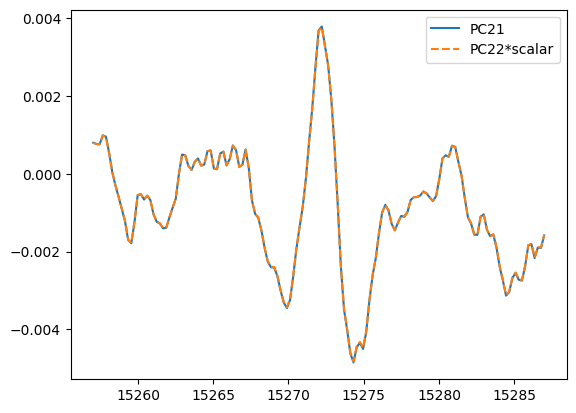

In [45]:
# plt.errorbar(measurements['wavelength'], data_flux_dT, noise_std_dT)
plt.plot(measurements['wavelength'], measurements['PC2_1'].values*100,label = 'PC21')
plt.plot(measurements['wavelength'], measurements['PC2_2'].values,label = 'PC22*scalar', linestyle = 'dashed')
plt.legend()

<KeysViewHDF5 ['cov', 'mean', 'var']>


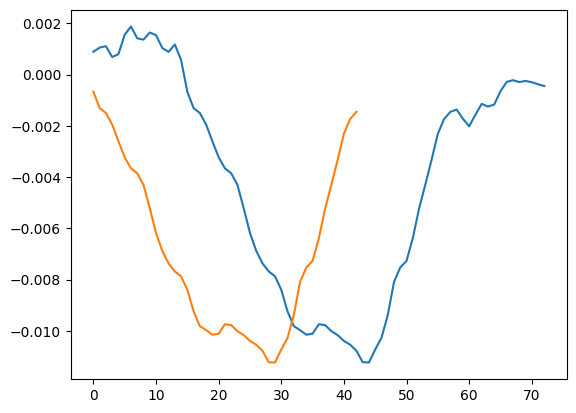

In [61]:
print(errs0.keys())
idx = 1
c = 35
plt.plot(errs0['mean'][0,:,idx][c:-c])
ex = 15
c += ex
plt.plot(errs0['mean'][0,:,idx][c:-c])

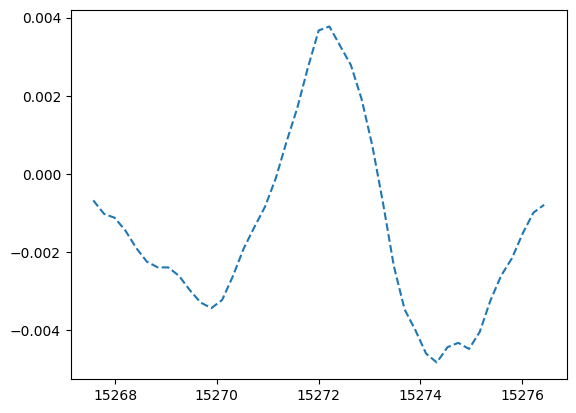

In [62]:
plt.plot(measurements['wavelength'][c:-c], measurements['PC2_2'].values[c:-c],label = 'PC22*scalar', linestyle = 'dashed')

In [2]:
files = [f for f in files if 'update' in f]
files = [f for f in files if 'tau' in f]

files

['bc_run_SymmetryCs_BCTrue_F1p0_DTrue_FlatFalse_SpecTrue_dTTrue_covFalse_nonlinFalse_tauSlope0p05_update_noalpha.h5',
 'bc_run_SymmetryCs_BCTrue_F1p0_DTrue_FlatFalse_SpecFalse_dTTrue_covFalse_nonlinFalse_tauSlope0p05_update.h5',
 'bc_run_SymmetryCs_BCTrue_F1p0_DTrue_FlatFalse_SpecTrue_dTTrue_covFalse_nonlinFalse_tauSlope0p0001_update_notau_noalpha.h5',
 'bc_run_SymmetryCs_BCTrue_F1p0_DTrue_FlatFalse_SpecTrue_dTFalse_covFalse_nonlinFalse_tauSlope0p05_update.h5',
 'bc_run_SymmetryC2v_BCTrue_F1p0_DFalse_FlatFalse_SpecTrue_dTTrue_covFalse_nonlinFalse_tauSlope0p05_update.h5',
 'bc_run_SymmetryCs_BCTrue_F1p0_DTrue_FlatFalse_SpecTrue_dTTrue_covFalse_nonlinFalse_tauSlope0p05_update.h5',
 'bc_run_SymmetryCs_BCFalse_F1p0_DFalse_FlatFalse_SpecTrue_dTTrue_covFalse_nonlinFalse_tauSlope0p05_update.h5',
 'bc_run_SymmetryC2v_BCTrue_F1p0_DTrue_FlatFalse_SpecTrue_dTFalse_covFalse_nonlinFalse_tauSlope0p05_update.h5',
 'bc_run_SymmetryCs_BCFalse_F1p0_DTrue_FlatFalse_SpecTrue_dTTrue_covFalse_nonlinFalse_ta

bc_run_SymmetryC2v_BCTrue_F1p0_DFalse_FlatFalse_SpecTrue_dTTrue_covFalse_nonlinFalse_update.h5
Loaded backend with 64 walkers and 10000 steps.
Autocorrelation times (steps): [321.50938461 433.36322534 540.29174263 531.46705346 681.78217466
 427.77013505 550.67592141 512.6844616 ]


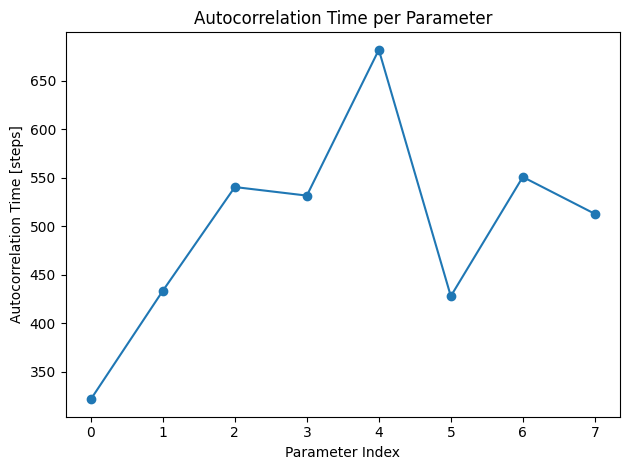

In [65]:
idx = 1
f = files[idx]
backend_file = backend_dir+f
print(f)
# backend_file = backend_dir+'full_run_Cs_BCTrue_F1p0_DTrue_FlatFalse_SpecTrue_dTFalse_covFalse.h5'
# backend_file = backend_dir+'full_run_Cs_ATrue_F2p0_DTrue_FlatFalse_SpecTrue_dTTrue_covFalse.h5'

# backend_file = backend_dir+'full_run_AFalse_F5p0_DTrue_FlatFalse_SpecTrue_dTTrue_covFalse.h5'

# backend_file = backend_dir+'full_run_ATrue_F5p0_DTrue_FlatFalse_SpecTrue_dTFalse_covTrue.h5'
# backend_file = backend_dir+'full_run.h5'
discard = 0  # number of burn-in steps to discard
thin = 10      # thinning factor for chains
flat = True    # whether to flatten the chain
max_autocorr_steps = 100  # how far to try computing autocorr
# ====================

# Load the backend
backend = emcee.backends.HDFBackend(backend_file, read_only=True)
n_steps, n_walkers, n_dim = backend.get_chain().shape
print(f"Loaded backend with {n_walkers} walkers and {n_steps} steps.")

# Check if there's enough data
if n_steps < 2 * discard:
    raise RuntimeError("Too few samples to discard burn-in.")

# Compute autocorrelation time
try:
    tau = backend.get_autocorr_time(tol=0, discard=discard)
    print("Autocorrelation times (steps):", tau)
except emcee.autocorr.AutocorrError:
    print("WARNING: Autocorrelation time could not be reliably estimated. Showing partial results.")
    tau = None

# Plot autocorrelation estimate per parameter (if possible)
if tau is not None:
    fig, ax = plt.subplots()
    ax.plot(tau, "o-")
    ax.set_xlabel("Parameter Index")
    ax.set_ylabel("Autocorrelation Time [steps]")
    ax.set_title("Autocorrelation Time per Parameter")
    plt.tight_layout()
    plt.show()

Loaded backend with 64 walkers, 10000 steps, 8 dimensions.


  0%|          | 0/200 [00:00<?, ?it/s]

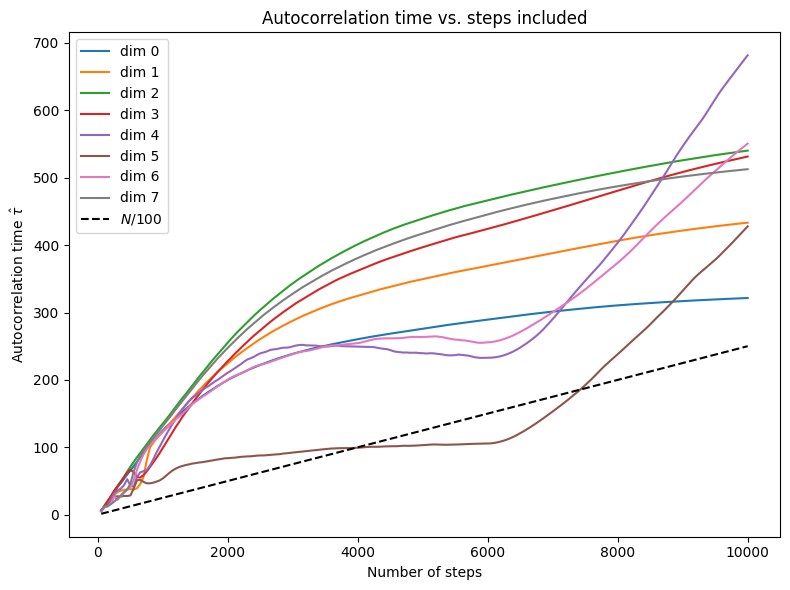

In [66]:
discard = 0
thin = 1
step_stride = 50
min_steps = 50

# ====================

# Load backend and chain
backend = emcee.backends.HDFBackend(backend_file, read_only=True)
full_chain = backend.get_chain(discard=discard, thin=thin)
n_steps, n_walkers, n_dim = full_chain.shape
max_steps = n_steps+100
print(f"Loaded backend with {n_walkers} walkers, {n_steps} steps, {n_dim} dimensions.")

# Limit the max_steps to what's available
max_steps = min(max_steps, n_steps)

# Storage
all_taus = []
step_list = []

# Loop over truncated chains
for n in tqdm( range(min_steps, max_steps + 1, step_stride) ):
    truncated = full_chain[:n]  # shape (n, n_walkers, n_dim)
    try:
        tau = emcee.autocorr.integrated_time(truncated, tol=0)
        all_taus.append(tau)
        step_list.append(n)
    except emcee.autocorr.AutocorrError:
        print(f"Step {n}: autocorr failed")
        continue

# Convert to arrays
all_taus = np.array(all_taus)  # shape (num_points, ndim)
step_list = np.array(step_list)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(n_dim):
    ax.plot(step_list, all_taus[:, i], label=f"dim {i}")
ax.plot(step_list, step_list / 40, "--k", label=r"$N/100$")

ax.set_xlabel("Number of steps")
ax.set_ylabel(r"Autocorrelation time $\hat{\tau}$")
ax.set_title("Autocorrelation time vs. steps included")
ax.legend()
plt.tight_layout()
plt.show()


In [85]:
backend_dir =  osp.expanduser("~/../../scratch/gpfs/cj1223/DIB/")  # <- replace with your emcee backend file
files = [f for f in os.listdir(backend_dir) if 'temp' not in f]
files = [f for f in files if 'update' in f]
files = [f for f in files if 'Slope' in f]
files = [f for f in files if 'Cs' in f]
files = [f for f in files if 'SpecFalse' in f]

files

['bc_run_SymmetryCs_BCTrue_F1p0_DTrue_FlatFalse_SpecFalse_dTTrue_covFalse_nonlinFalse_tauSlope0p05_update.h5',
 'bc_run_SymmetryCs_BCTrue_F1p0_DTrue_FlatFalse_SpecFalse_dTFalse_covFalse_nonlinFalse_tauSlope0p05_update.h5']

In [86]:
mpl.rcParams.update(mpl.rcParamsDefault)
idx = 0
filename = files[idx]
f = filename
backend_file = backend_dir+filename
backend = emcee.backends.HDFBackend(backend_file, read_only=True)
full_chain = backend.get_chain(discard=discard, thin=thin)
n_steps, n_walkers, n_dim = full_chain.shape
print(f"Loaded backend with {n_walkers} walkers, {n_steps} steps, {n_dim} dimensions.")

Loaded backend with 64 walkers, 867 steps, 8 dimensions.


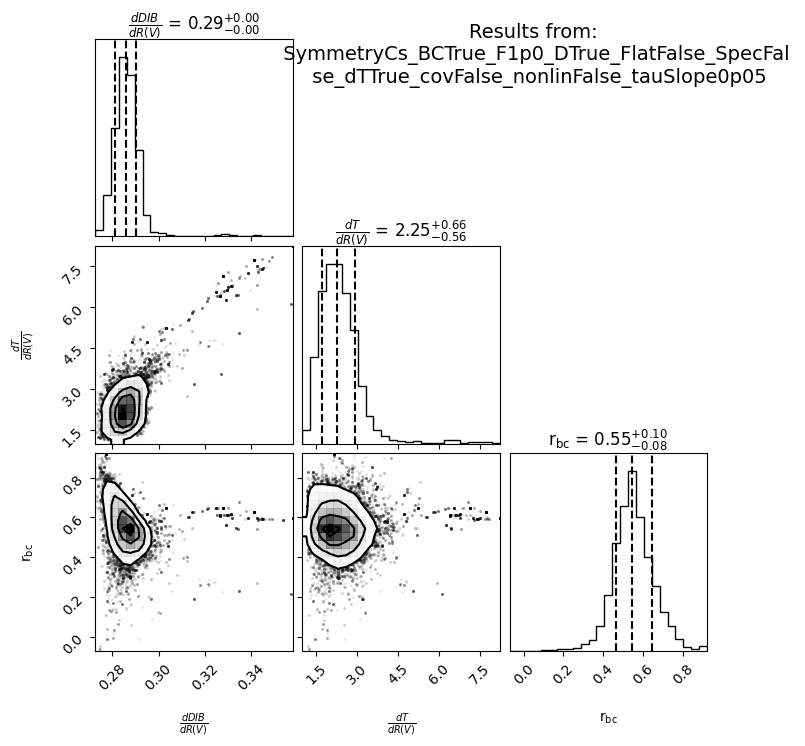

In [87]:
raw = False
correct_r_bc = False
asize = 2.5
cRV = 0.3
deltaT = 0.05
if raw:
    discard = int( 3*np.mean(all_taus[-1, :]) )
    if discard > n_steps:
        discard = n_steps//2
    blobs = backend.get_blobs(discard=discard, thin=thin, flat=flat)
    _, n_dim_blob = blobs.shape
    fig, axs = plt.subplots(n_dim_blob, n_dim_blob, figsize = ( asize * n_dim_blob, asize * n_dim_blob )) 
    labels = [r'$\gamma$', r'r$_{\mathrm{bc}}$', r'$c_{\mathrm{spec}}$', r'$\alpha$', r'$\beta$', r'$c_{\mathrm{\Delta T}}$']
    # Corner plot
    fig = corner.corner(
        blobs,
        labels=labels,
        bins = 25,
        show_titles=True,
        smooth = 0.6,
        quantiles=[0.16, 0.5, 0.84],
        title_fmt=".4f",
        range = [0.999]*len(labels),
        fig = fig
    )

if not raw:
    discard = int( 3*np.mean(all_taus[-1, :]) )
    if discard > n_steps:
        discard = n_steps//2
    blobs = backend.get_blobs(discard=discard, thin=thin, flat=flat)
    n_dim_blob = 3
    if correct_r_bc:
        scales = np.random.normal(0.13, 0.05, size = len(blobs))
        scales = np.abs(scales)
        mus = np.random.normal(0.61, 0.04, size = len(blobs))
        
        blobs[:,1] = np.random.normal(mus, scales, size = len(blobs))
    fig, axs = plt.subplots(n_dim_blob, n_dim_blob, figsize = ( asize * n_dim_blob, asize * n_dim_blob )) 
    labels = [r'$\frac{dDIB}{dR(V)} = \frac{\alpha}{c_{R(V)} \cdot \gamma}$',\
              r'$\frac{dR(V)}{dT} = \frac{\beta}{\Delta T \cdot c_{R(V)}}$', r'ratio$_{\mathrm{bc}}$']

    labels = [r'$\frac{dDIB}{dR(V)}$', r'$\frac{dT}{dR(V)}$', r'r$_{\mathrm{bc}}$']

    # Corner plot
    phys_vals = np.vstack([ blobs[:,3]/(blobs[:,0]*cRV), deltaT*blobs[:,4]/(blobs[:,0]*cRV), blobs[:,1]]).T
    fig = corner.corner(
        phys_vals,
        labels=labels,
        bins = 25,
        show_titles=True,
        smooth = 0.6,
        quantiles=[0.16, 0.5, 0.84],
        title_fmt=".2f",
        range = [0.999]*len(labels),
        fig = fig
    )

if len(f) < 109:
    title = f'\n {f[7:len(f)//2]} \n {f[len(f)//2:-10]}'
else:
    title = f'\n {f[7:len(f)//3]} \n {f[len(f)//3:2*len(f)//3]} \n {f[2*len(f)//3:-3]}'
    
fig.suptitle(f'Results from: {title}', y = 0.97, x = 0.72, fontsize = 14)
fig

Samples shape: (37248, 8)


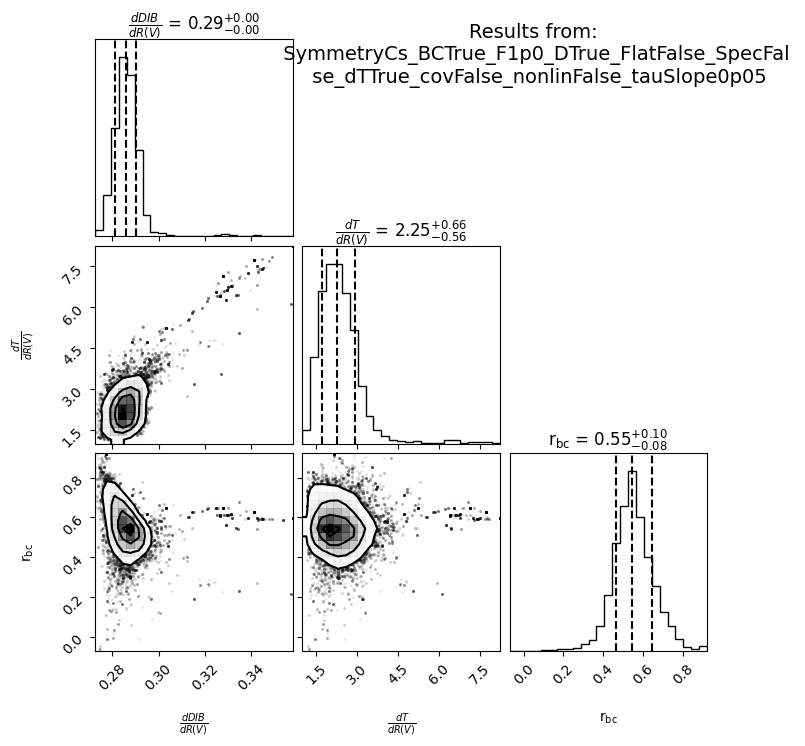

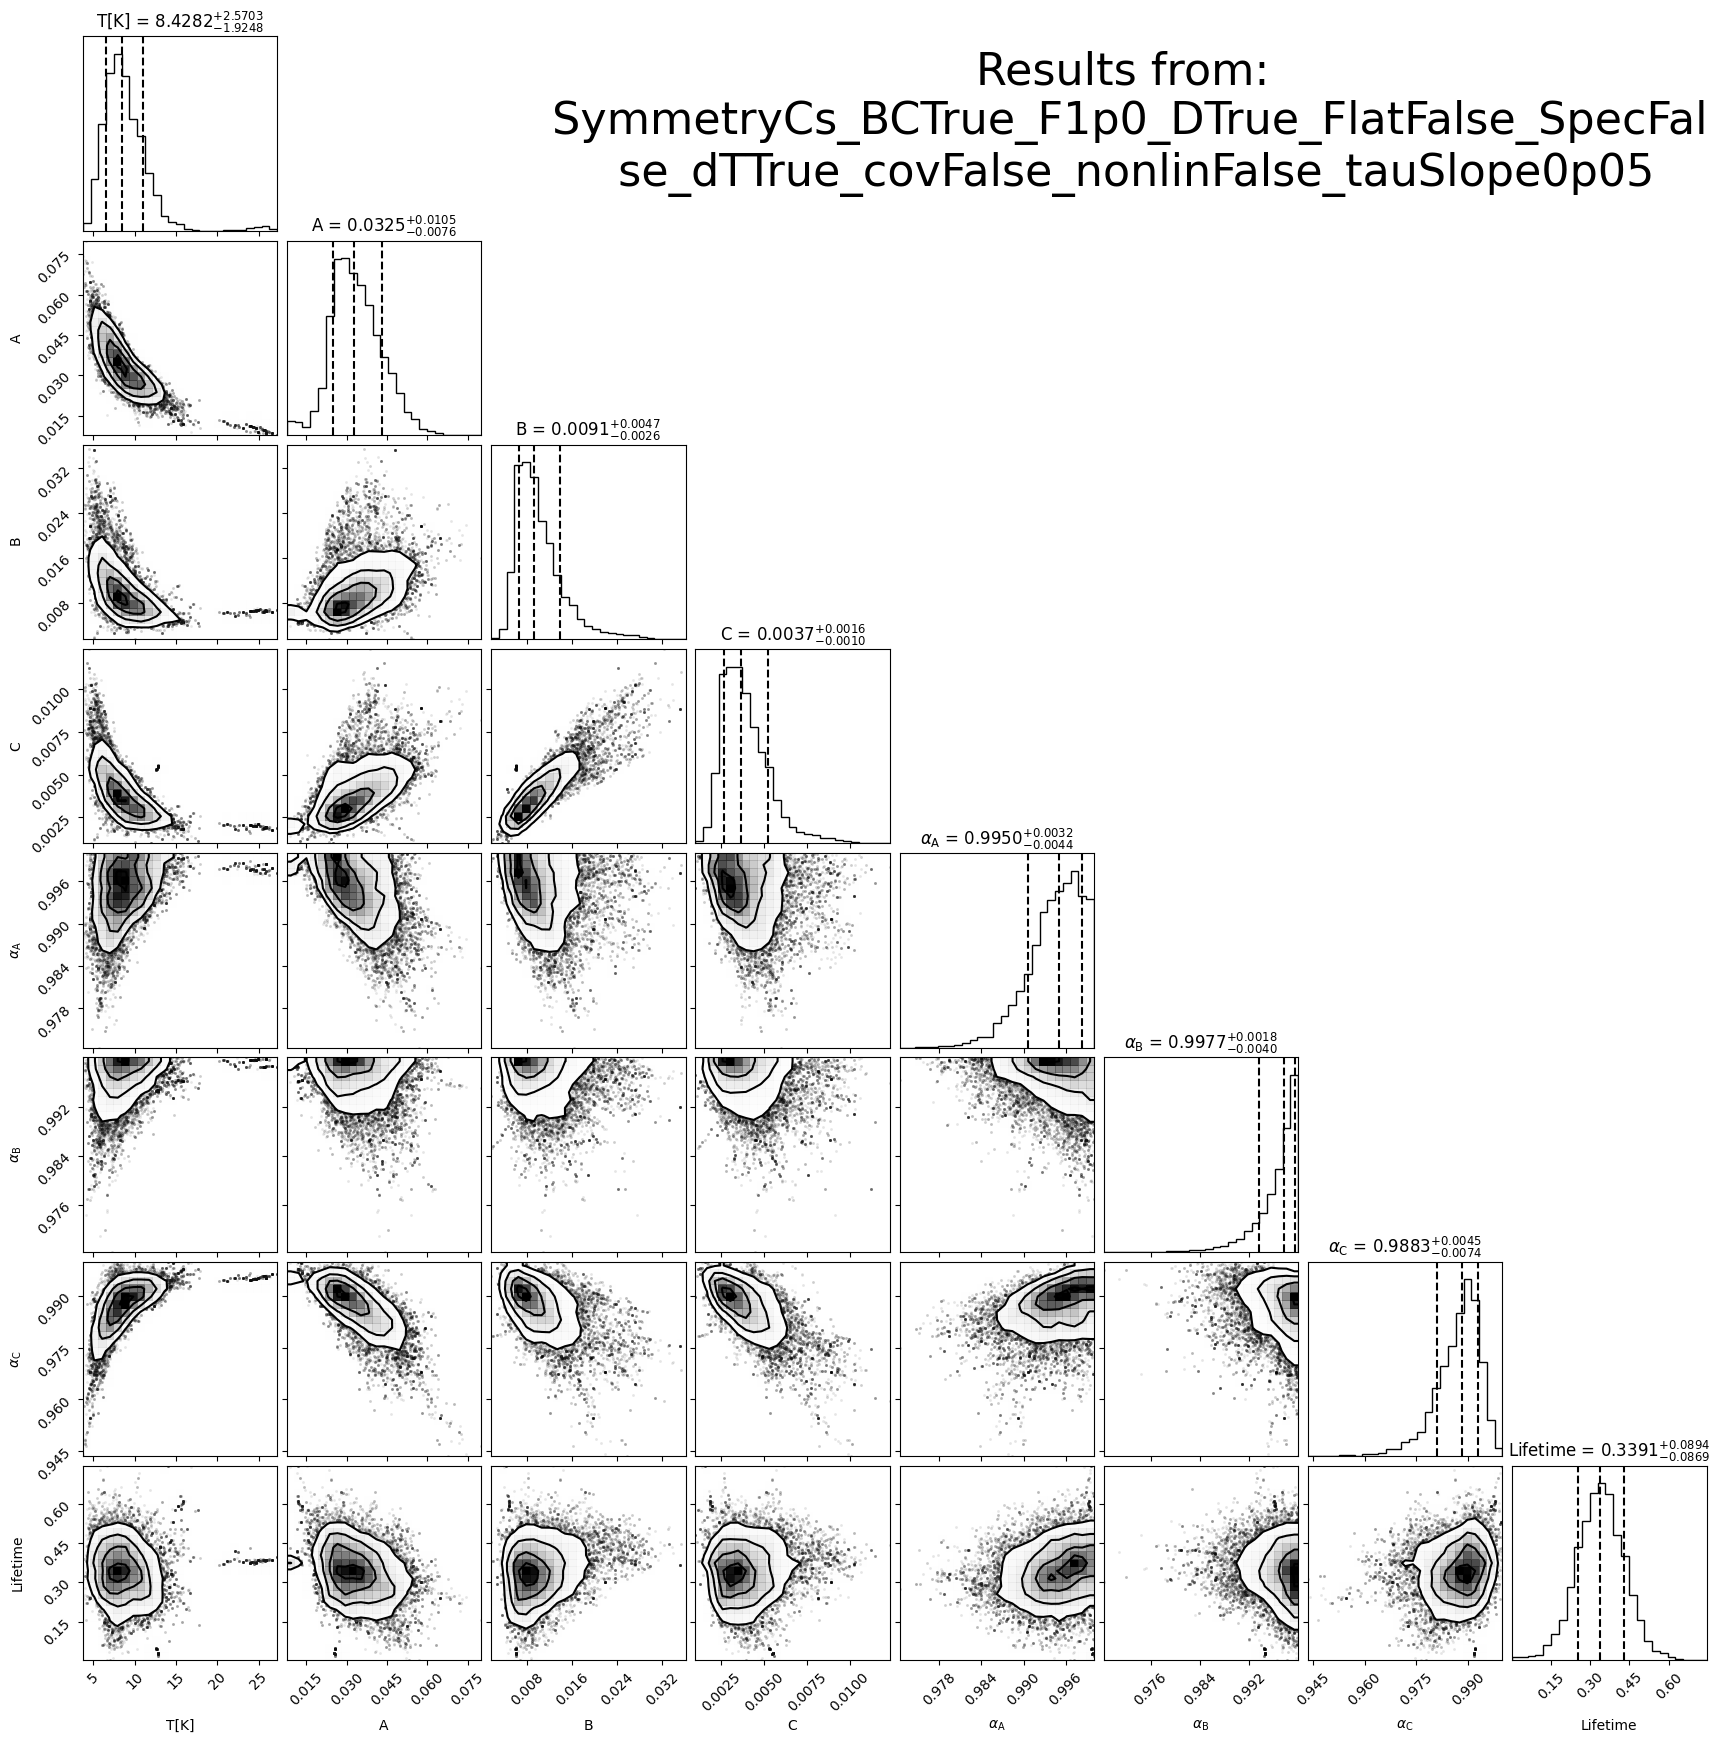

In [88]:
asize = 2.2
cut_stuck = False

T_fac = 1.2
if n_dim == 6:
    # Extract samples
    fig, axs = plt.subplots(n_dim, n_dim, figsize = ( asize * n_dim, asize * n_dim )) 
    thin = 1
    discard = int( 3*np.mean(all_taus[-1, :]) )
    if discard > n_steps:
        discard = n_steps//2
    samples = backend.get_chain(discard=discard, thin=thin, flat=flat)
    log_prob = backend.get_log_prob(discard=discard, thin=thin, flat=flat)
    if cut_stuck:
        samples = samples[samples[:,0]<15] # two stuck walkers
    
    print(f"Samples shape: {samples.shape}")
    if T_fac:
        samples[:,0]*=T_fac
    # labels = [r'$\alpha_{\mathrm{C}}$', r'$\alpha_{\mathrm{AB}}$', r'$\mathrm{C}$', r'$\mathrm{AB}$', 'T[K]']
    labels = ['T[K]', '$\\mathrm{A}$', '$\\mathrm{BC}$', '$\\alpha_{\\mathrm{A}}$', '$\\alpha_{\\mathrm{BC}}$', r'Lifetime']
    # Corner plot
    fig = corner.corner(
        samples,
        labels=labels,
        bins = 25,
        show_titles=True,
        smooth = 0.6,
        quantiles=[0.16, 0.5, 0.84],
        title_fmt=".4f",
        range = [0.99999]*len(labels),
        fig = fig
    )


if n_dim == 8:
    # Extract samples
    fig, axs = plt.subplots(n_dim, n_dim, figsize = ( asize * n_dim, asize * n_dim )) 
    thin = 1
    discard = int( 3*np.mean(all_taus[-1, :]) )
    if discard > n_steps:
        discard = n_steps//2
    samples = backend.get_chain(discard=discard, thin=thin, flat=flat)
    log_prob = backend.get_log_prob(discard=discard, thin=thin, flat=flat)
    if cut_stuck:
        samples = samples[samples[:,0]<15] # two stuck walkers
    # samples_ext = samples[samples[:,0]>10]
    # samples = np.vstack([samples, samples_ext, samples_ext, samples_ext])
    print(f"Samples shape: {samples.shape}")
    if T_fac:
        samples[:,0]*=T_fac
    labels = ['T[K]', '$\\mathrm{A}$', '$\\mathrm{B}$', '$\\mathrm{C}$', '$\\alpha_{\\mathrm{A}}$', '$\\alpha_{\\mathrm{B}}$', '$\\alpha_{\\mathrm{C}}$', r'Lifetime']
    # Corner plot
    fig = corner.corner(
        samples,
        labels=labels,
        bins = 25,
        show_titles=True,
        smooth = 0.6,
        quantiles=[0.16, 0.5, 0.84],
        title_fmt=".4f",
        range = [0.99999]*len(labels),
        fig = fig
    )

if len(f) < 109:
    title = f'\n {f[7:len(f)//2]} \n {f[len(f)//2:-10]}'
else:
    title = f'\n {f[7:len(f)//3]} \n {f[len(f)//3:2*len(f)//3]} \n {f[2*len(f)//3:-3]}'
    
fig.suptitle(f'Results from: {title}', y = 0.97, x = 0.65, fontsize = 24*(n_dim/6))
plt.show()

In [89]:
fudge = 1
DIB_15272 = h5py.File('new_errs/res_dib_15272.h5', "r")
data_wavelength = DIB_15272['wav'][:]
data_flux = DIB_15272['mean'][:][:,0]
data_flux_dT = DIB_15272['mean'][:][:,1]

noise_std = fudge*np.sqrt(DIB_15272['var'][:][:,0])
noise_std_dT = fudge*np.sqrt(DIB_15272['var'][:][:,1])

# errs0 = h5py.File(osp.expanduser('~/DIB/jackknife_dib.h5'), "r")
# measurements = pd.read_csv(osp.expanduser('~/DIB/pca_version.txt'), sep='\s+', names=['wavelength', 'PC1_1', 'PC1_2', 'PC2_1', 'PC2_2'])
# data_wavelength = np.array( measurements['wavelength'] )
# data_flux = measurements['PC1_1'].values
# data_flux_dT = measurements['PC2_2'].values
# noise_std = fudge * np.sqrt(errs0['var'][:, 0])
# noise_std_dT = np.sqrt(errs0['var'][:, 1])

In [92]:
from multiprocessing import get_context
import subprocess, os, emcee, time, shutil, h5py, argparse
from scipy.ndimage import gaussian_filter
import numpy as np
import pandas as pd
import os.path as osp
from pathlib import Path
from scipy.signal import fftconvolve
from scipy.signal import convolve
from scipy.interpolate import interp1d

# Constants
PGO_TEMPLATE = osp.expanduser("~/DIB/pgo_files/asym_top_15272_Cs.pgo")

def filename_base(T, A_base, B_base, C_base, frac_A, frac_B, frac_C, lorentz_width=0.01, axis = 'b'):
    return f"T{T:.3f}_A{A_base:.7f}_B{B_base:.7f}_C{C_base:.7f}_FA{frac_A:.5f}_FB{frac_B:.5f}_FC{frac_C:.5f}_ax{axis}_lifetime{lorentz_width:.3f}"

def generate_pgopher_input_Cs(T, A_base, B_base, C_base, frac_A, frac_B, frac_C, lorentz_width=0.01, axis="b"):
    A_g, B_g, C_g = A_base, B_base, C_base
    A_e, B_e, C_e = A_base * frac_A, B_base * frac_B, C_base * frac_C

    base = filename_base(T, A_base, B_base, C_base, frac_A, frac_B, frac_C, axis = axis)
    pgo_file = os.path.join(TEMP_DIR, f"temp_{base}.pgo")
    spec_txt = os.path.join(TEMP_DIR, f"spec_{base}.txt")

    awk_script = f'''
    awk -v temp="{T}" \\
        -v A_ground="{A_g}" -v B_ground="{B_g}" -v C_ground="{C_g}" \\
        -v A_excited="{A_e}" -v B_excited="{B_e}" -v C_excited="{C_e}" \\
        -v axis="{axis}" -v lorentz_width="{lorentz_width}" '
    BEGIN {{ inside_ground = 0; inside_excited = 0; }}
    /<Parameter Name="Temperature" Value="/ {{
        sub(/Value="[0-9.eE+-]+"/, "Value=\\"" temp "\\"")
    }}
    /<AsymmetricManifold Name="Ground"/ {{ inside_ground = 1 }}
    /<AsymmetricManifold Name="Excited"/ {{ inside_excited = 1 }}
    /<\/AsymmetricManifold>/ {{ inside_ground = 0; inside_excited = 0 }}
    inside_ground && /<Parameter Name="A" Value="/ {{ sub(/Value="[0-9.eE+-]+"/, "Value=\\"" A_ground "\\"") }}
    inside_ground && /<Parameter Name="B" Value="/ {{ sub(/Value="[0-9.eE+-]+"/, "Value=\\"" B_ground "\\"") }}
    inside_ground && /<Parameter Name="C" Value="/ {{ sub(/Value="[0-9.eE+-]+"/, "Value=\\"" C_ground "\\"") }}
    inside_excited && /<Parameter Name="A" Value="/ {{ sub(/Value="[0-9.eE+-]+"/, "Value=\\"" A_excited "\\"") }}
    inside_excited && /<Parameter Name="B" Value="/ {{ sub(/Value="[0-9.eE+-]+"/, "Value=\\"" B_excited "\\"") }}
    inside_excited && /<Parameter Name="C" Value="/ {{ sub(/Value="[0-9.eE+-]+"/, "Value=\\"" C_excited "\\"") }}
    /<CartesianTransitionMoment Axis="/ {{
        sub(/Axis="[^"]+"/, "Axis=\\"" axis "\\"")
    }}
    /<Parameter Name="Lorentzian" Value="/ {{
        sub(/Value="[0-9.eE+-]+"/, "Value=\\"" lorentz_width "\\"")
    }}
    {{ print }}
    ' {PGO_TEMPLATE} > {pgo_file}
    '''

    subprocess.run(awk_script, shell=True, check=True, executable="/bin/bash")
    subprocess.run([osp.expanduser("~/DIB/./pgo"), "--plot", pgo_file, spec_txt], check=True, stdout=subprocess.DEVNULL)
    return spec_txt, base

generate_pgopher_input = generate_pgopher_input_Cs

def convolve_pgopher_spectrum(spectrum_file, center_wav, lsf_key='LCO+APO', dlam=0.01, window=8):
    """
    Convolve PGOPHER output using LSF evaluated on a regular wavelength grid.

    Parameters:
        spectrum_file (str): PGOPHER output file with [wavenumber (1/cm), flux].
        center_wav (float): Central wavelength for the LSF (Å).
        lsf_key (str): Instrument profile selector (placeholder).
        dlam (float): Spacing (Å) for the regular wavelength grid.
        window (float): Half-width (Å) of the wavelength region to define the regular grid.

    Returns:
        wav_lsf (np.ndarray): Wavelength grid used for final output.
        flux_on_lsf_grid (np.ndarray): Flux convolved and resampled to wav_lsf.
        lsf_kernel (np.ndarray): LSF evaluated on regular grid.
        wav_pgo (np.ndarray): Original PGOPHER wavelength grid.
        convolved_flux (np.ndarray): Full-resolution convolved flux (on regular grid).
    """
    # === Load PGOPHER spectrum ===
    inv_cm, flux = np.loadtxt(spectrum_file).T
    wav_pgo = 1e8 / inv_cm

    wavc = 15272.27178113337
    # === Define regular wavelength grid around center ===
    wav_reg = np.arange(wavc - window, wavc + window, dlam)

    # === Interpolate PGOPHER flux onto this regular grid ===
    flux_interp = interp1d(wav_pgo, flux, bounds_error=False, fill_value=0.0)
    flux_reg = flux_interp(wav_reg)

    # === Construct LSF kernel on regular grid ===
    sig1 = 0.3
    sig2 = 1.85 * sig1
    sig3 = 9.5 * sig1
    f1 = 0.895
    f2 = 0.1
    c0 = 1.3e-3

    rel_grid = wav_reg - wavc  # Center the kernel
    p1 = 1/np.sqrt(2*np.pi*sig1**2)*np.exp( - rel_grid**2 / (2 * sig1**2) )
    p2 = 1/np.sqrt(2*np.pi*sig2**2)*np.exp( - rel_grid**2 / (2 * sig2**2) )
    p3 = 1/np.sqrt(2*np.pi*sig3**2)*np.exp( - rel_grid**2 / (2 * sig3**2) )

    lsf_kernel = f1 * p1 + f2 * p2 + (1 - f1 - f2) * p3 + c0
    lsf_kernel /= np.sum(lsf_kernel)

    # === Convolve on regular grid ===
    convolved_flux = convolve(flux_reg, lsf_kernel, mode='same')

    # === Interpolate back to original PGOPHER (or LSF) grid ===
    out_interp = interp1d(wav_reg, convolved_flux, bounds_error=False, fill_value=0.0)

    if args.use_direct:
        lsf_file = osp.expanduser('~/DIB/LSFs/lsf_15272.h5')
        # Load LSF and its wavelength grid
        with h5py.File(lsf_file, 'r') as f:
            wav_load = f['wav'][:]
        
    else:
        measurements = pd.read_csv(osp.expanduser('~/DIB/pca_version.txt'), sep='\s+', names=['wavelength', 'PC1_1', 'PC1_2', 'PC2_1', 'PC2_2'])
        wav_load = measurements['wavelength']
    flux_on_lsf_grid = out_interp(wav_load)

    return wav_load, flux_on_lsf_grid

def log_prior_Cs(params):
    if args.B_not_equal_C:
        if len(params) != 8:
            return -np.inf
        T, A, B, C, frac_A, frac_B, frac_C, lorentz_width  = params
    else:
        if len(params) != 6:
            return -np.inf
        T, A, C, frac_A, frac_C, lorentz_width = params
        B = C
        frac_B = frac_C

    if args.flat_prior:
        if not (3 <= T <= 100): return -np.inf
        if not (0.0001 <= C <= 0.04): return -np.inf
        if not (0.0001 <= B <= 0.04): return -np.inf
        if not (0.0001 <= A <= 0.3): return -np.inf
        if not (0.9 <= frac_A <= 1.0): return -np.inf
        if not (0.9 <= frac_B <= 1.0): return -np.inf
        if not (0.9 <= frac_C <= 1.0): return -np.inf
        if not (0.0 <= lorentz_width <= 1.0): return -np.inf
        return 0.0
    else:
        if T <= 3 or T > 100: return -np.inf
        ## params for log-normal Temp prior
        mu = np.log(25)
        sigma = 0.4
        temp_logprior = -np.log(T * sigma * np.sqrt(2 * np.pi)) - ((np.log(T) - mu) ** 2) / (2 * sigma ** 2)

        if C < 0.0005 or C > 0.3: return -np.inf
        if B < 0.0005 or B > 0.3: return -np.inf
        if not (0.0 <= lorentz_width <= 1.0):
            return -np.inf
        else:
            lorentz_width_prior = - (lorentz_width/args.tau_prior) #exponential
        
        if B>A:
            print('ARGH')
            return np.inf # if enforcing hierarchy
        if args.B_not_equal_C:
            if C>=B: return np.inf # if enforcing hierarchy
        
        if args.B_not_equal_C:
            C0 = (1/A+1/B)**(-1)
            CB_logprior = - ( (C-C0)/( np.sqrt(2) * 1 * C0 ) )**2
        else:
            CB_logprior = 0.0

        if A < 0.001 or A > 0.3: return -np.inf
        A_logprior = - ((0.013 - C)**2/(2*0.02**2))

        if frac_A > 1: return -np.inf
        alpha_sig = args.alpha_prior
        frac_a_logprior = - (frac_A - 1) ** 2 / (2*alpha_sig**2)

        if frac_B > 1: return -np.inf
        frac_b_logprior = - (frac_B - 1) ** 2 / (2*alpha_sig**2)

        if frac_C > 1: return -np.inf
        frac_c_logprior = - (frac_C - 1) ** 2 / (2*alpha_sig**2)
        frac_c_logprior = -100 * (frac_C - 1) ** 2

        return temp_logprior + CB_logprior + A_logprior + frac_a_logprior + frac_b_logprior + frac_c_logprior + lorentz_width_prior

log_prior = log_prior_Cs

def compute_loglikelihood_Cs(
    model_flux_b, model_flux_c,
    model_flux_dT_b, model_flux_dT_c,
    data_flux, data_flux_dT,
    noise_std, noise_std_dT
):
    chi2 = 0.0

    if args.use_direct:
        c = 10  # edge crop
    else:
        c = 30

    gf = 0.01  # Gaussian filter width
    b_frac = c_frac = offset = 0
    b_frac_dT = c_frac_dT = offset_dT = 0
    base_frac_dT = 0
    if args.use_scalar_prior:
        # Apply Gaussian filter and crop edges
        spec_b = gaussian_filter(model_flux_b[c:-c], gf)
        spec_c = gaussian_filter(model_flux_c[c:-c], gf)
        measurement = data_flux[c:-c]
        noise = noise_std[c:-c]

        # Fit linear combination: b_frac * spec_b + c_frac * spec_c + offset
        M = np.vstack([spec_b, spec_c, np.ones_like(spec_b)]).T
        coeffs, _, _, _ = np.linalg.lstsq(M, measurement, rcond=None)
        b_frac, c_frac, offset = coeffs

        # Evaluate fit
        fit = b_frac * spec_b + c_frac * spec_c + offset
        chi = (measurement - fit) / noise
        chi2 += np.sum(chi ** 2)

    
        # Apply Gaussian filter and crop edges
        spec_b = gaussian_filter(model_flux_b[c:-c], gf)
        spec_c = gaussian_filter(model_flux_c[c:-c], gf)
        spec_dT_b = gaussian_filter(model_flux_dT_b[c:-c], gf) - spec_b
        spec_dT_c = gaussian_filter(model_flux_dT_c[c:-c], gf) - spec_c
        measurement_dT = data_flux_dT[c:-c]
        noise_dT = noise_std_dT[c:-c]

        # Estimate direct ratio to construct the base spectrum
        if args.fit_spec:
            ratio_direct = b_frac / (c_frac + 1e-10)
        else:
            ratio_direct = 1.0  # fallback

        # Form matrix: linear combo of original + delta spectra
        base_spec = spec_b + ratio_direct * spec_c
        M_dT = np.vstack([base_spec, spec_dT_b, spec_dT_c, np.ones_like(base_spec)]).T
        coeffs_dT, _, _, _ = np.linalg.lstsq(M_dT, measurement_dT, rcond=None)
        base_frac_dT, b_frac_dT, c_frac_dT, offset_dT = coeffs_dT

        # Evaluate fit
        fit_dT = (
            base_frac_dT * base_spec +
            b_frac_dT * spec_dT_b +
            c_frac_dT * spec_dT_c +
            offset_dT
        )
        chi_dT = (measurement_dT - fit_dT) / noise_dT
        chi2 += np.sum(chi_dT ** 2)

        # Optional: ratio constraint on the shape of the dT contributions
        ratio_dT = b_frac_dT / (c_frac_dT + 1e-10)
        ratio_tol = 0.01 * ratio_direct
        ratio_deviation = ((ratio_dT - ratio_direct) / ratio_tol) ** 2
        chi2 += ratio_deviation
        
        scalars = np.array([
        float(b_frac), float(c_frac), float(offset),
        float(base_frac_dT), float(b_frac_dT), float(c_frac_dT), float(offset_dT)])
    else:
        ## New as of August 4th, doing joint fit for the ratio between b- and c-type transitions
        ## I think that this has to be non-linear, so switching to scipy.optimize
        if args.fit_spec and args.fit_dT and args.nonlinear_fit: 
            from scipy.optimize import least_squares
            
            # Apply Gaussian filters and crop
            spec_b = gaussian_filter(model_flux_b[c:-c], gf)
            spec_c = gaussian_filter(model_flux_c[c:-c], gf)
            measurement = data_flux[c:-c]
            noise = noise_std[c:-c]

            spec_dT_b = gaussian_filter(model_flux_dT_b[c:-c]-model_flux_b[c:-c], gf)
            spec_dT_c = gaussian_filter(model_flux_dT_c[c:-c]-model_flux_c[c:-c], gf)
            measurement_dT = data_flux_dT[c:-c]
            noise_dT = noise_std_dT[c:-c]

            # Define residuals function
            def residuals(params):
                # Unpack parameters
                gamma, ratio_bc, offset_spec, alpha_dT, beta_dT, offset_dT = params

                # First fit residuals
                fit = gamma * ( spec_b + ratio_bc * spec_c ) + offset_spec
                chi = (measurement - fit) / noise

                # dT fit residuals
                base_spec = spec_b + ratio_bc * spec_c
                fit_dT = (
                    alpha_dT * base_spec + #primary spectrum
                    beta_dT * ( spec_dT_b  +  ratio_bc * spec_dT_c ) +  offset_dT #dT spectrum
                )
                chi_dT = (measurement_dT - fit_dT) / noise_dT

                return np.concatenate([chi, chi_dT])

            # Initial guess
            x0 = [1.0, 1.0, 0.0, 1.0, 1.0, 0.0]

            # Perform nonlinear least squares fit
            result = least_squares(residuals, x0)

            # Unpack results
            gamma, ratio_bc, offset_spec, alpha_dT, beta_dT, offset_dT = result.x
            # b_frac, c_frac, offset, base_frac_dT, b_frac_dT, c_frac_dT, offset_dT = gamma, gamma*ratio_bc, offset_spec, alpha_dT, beta_dT, beta_dT*ratio_bc, offset_dT 

            # Evaluate fits if needed
            fit = gamma * spec_b + gamma*ratio_bc * spec_c + offset_spec
            fit_dT = (
                alpha_dT * (spec_b + ratio_bc * spec_c) +
                beta_dT * ( spec_dT_b  +  ratio_bc * spec_dT_c ) +  offset_dT
            )
            chi2 += np.sum( ( (measurement_dT - fit_dT) / noise_dT )**2 )
            chi2 += np.sum( ( (measurement - fit) / noise )**2 )
            
            scalars = np.array([
            float(gamma), float(ratio_bc), float(offset_spec),
            float(alpha_dT), float(beta_dT), float(offset_dT)])

        ## this is now a function that only does ratio_bc non-linearly
        elif args.fit_spec and args.fit_dT and not args.nonlinear_fit:
            from scipy.optimize import minimize

            # Apply Gaussian filters and crop
            spec_b = gaussian_filter(model_flux_b[c:-c], gf)
            spec_c = gaussian_filter(model_flux_c[c:-c], gf)
            measurement = data_flux[c:-c]
            noise = noise_std[c:-c]

            spec_dT_b = gaussian_filter(model_flux_dT_b[c:-c]-model_flux_b[c:-c], gf)
            spec_dT_c = gaussian_filter(model_flux_dT_c[c:-c]-model_flux_c[c:-c], gf)
            measurement_dT = data_flux_dT[c:-c]
            noise_dT = noise_std_dT[c:-c]

            # Residual function for minimize (only depends on ratio_bc)
            def objective(ratio_bc):
                # Build design matrix for spec fit: gamma * (spec_b + ratio_bc * spec_c) + offset_spec

                base_spec = spec_b + ratio_bc * spec_c
                delta_spec = spec_dT_b + ratio_bc * spec_dT_c
                X_spec = np.vstack([
                    base_spec,
                    np.ones_like(base_spec)
                ]).T
                y_spec = measurement

                # Weighted linear least squares for spec
                W_spec = 1.0 / noise
                Xw_spec = X_spec * W_spec[:, None]
                yw_spec = y_spec * W_spec
                coeffs_spec, _, _, _ = np.linalg.lstsq(Xw_spec, yw_spec, rcond=None)
                gamma, offset_spec = coeffs_spec

                # Build design matrix for dT fit:            
                X_dT = np.vstack([
                    base_spec,
                    delta_spec,
                    np.ones_like(base_spec)
                ]).T
                y_dT = measurement_dT

                # Weighted linear least squares for dT
                W_dT = 1.0 / noise_dT
                Xw_dT = X_dT * W_dT[:, None]
                yw_dT = y_dT * W_dT
                coeffs_dT, _, _, _ = np.linalg.lstsq(Xw_dT, yw_dT, rcond=None)
                alpha_dT, beta_dT, offset_dT = coeffs_dT

                # Compute total chi-squared
                fit_spec = gamma * base_spec + offset_spec
                fit_dT = alpha_dT * base_spec + beta_dT * delta_spec + offset_dT
                chi2_spec = np.sum(((measurement - fit_spec) / noise) ** 2)
                chi2_dT = np.sum(((measurement_dT - fit_dT) / noise_dT) ** 2)

                return chi2_spec + chi2_dT

            # Run outer optimization over ratio_bc
            opt_result = minimize(objective, x0=[1.0], method='L-BFGS-B')

            # Optimal ratio_bc
            ratio_bc = opt_result.x[0]

            # Final linear fits with optimal ratio_bc
            # Main spectrum
            X_spec = np.vstack([
                spec_b + ratio_bc * spec_c,
                np.ones_like(spec_b)
            ]).T
            y_spec = measurement
            W_spec = 1.0 / noise
            # W_dT = np.ones_like(noise)
            Xw_spec = X_spec * W_spec[:, None]
            yw_spec = y_spec * W_spec
            gamma, offset_spec = np.linalg.lstsq(Xw_spec, yw_spec, rcond=None)[0]

            # dT spectrum
            base_spec = spec_b + ratio_bc * spec_c
            delta_spec = spec_dT_b + ratio_bc * spec_dT_c
            X_dT = np.vstack([
                base_spec,
                delta_spec,
                np.ones_like(base_spec)
            ]).T
            y_dT = measurement_dT
            W_dT = 1.0 / noise_dT
            # W_dT = np.ones_like(noise_dT)

            Xw_dT = X_dT * W_dT[:, None]
            yw_dT = y_dT * W_dT
            alpha_dT, beta_dT, offset_dT = np.linalg.lstsq(Xw_dT, yw_dT, rcond=None)[0]

            # Evaluate fits
            fit = gamma * (spec_b + ratio_bc * spec_c) + offset_spec
            fit_dT = alpha_dT * base_spec + beta_dT * delta_spec + offset_dT
            chi2 += np.sum(((measurement - fit) / noise) ** 2)
            chi2 += np.sum(((measurement_dT - fit_dT) / noise_dT) ** 2)

            save = False
            if save:
                import random
                import string

                def generate_random_string(length):
                    """Generates a random string of specified length using letters and digits."""
                    characters = string.ascii_letters + string.digits
                    random_string = ''.join(random.choice(characters) for i in range(length))
                    return random_string

                # Example usage:
                random_str = generate_random_string(5)
                allf = np.vstack([fit, spec_b, spec_c, fit_dT, spec_dT_b, spec_dT_c])
                np.savetxt(f'temp_outputs/fit_spec_{random_str}.csv', allf)

            # print( ratio_bc )
            # Output scalar parameters
            scalars = np.array([
                float(gamma), float(ratio_bc), float(offset_spec),
                float(alpha_dT), float(beta_dT), float(offset_dT)
            ])
    
    return -0.5 * chi2, scalars, fit, fit_dT

compute_loglikelihood = compute_loglikelihood_Cs

In [93]:
import numpy as np
import h5py
import os.path as osp
from tqdm import tqdm
from types import SimpleNamespace
import re


# TEMP_SUFFIX = f"Symmetry{val_to_str(args.symmetry_group)}_BC{val_to_str(args.B_not_equal_C)}_F{val_to_str(args.fudge)}_D{val_to_str(args.use_direct)}_" + \
#               f"Flat{val_to_str(args.flat_prior)}_Spec{val_to_str(args.fit_spec)}_dT{val_to_str(args.fit_dT)}_cov{val_to_str(args.cov)}_nonlin{val_to_str(args.nonlinear_fit)}"+ \
#               f'_tauSlope{val_to_str(args.tau_prior)}_{args.title}'

def parse_args_from_filename(filename):
    match = re.search(
        r"BC(?P<B_not_equal_C>True|False)_"
        r"F(?P<fudge>[\dp]+)_"
        r"D(?P<use_direct>True|False)_"
        r"Flat(?P<flat_prior>True|False)_"
        r"Spec(?P<fit_spec>True|False)_"
        r"dT(?P<fit_dT>True|False)_"
        r"cov(?P<covariance>True|False)",
        filename
    )

    if not match:
        raise ValueError("Filename format doesn't match expected pattern")

    args = match.groupdict()

    # Convert types
    args['B_not_equal_C'] = args['B_not_equal_C'] == "True"
    args['fudge'] = float(args['fudge'].replace('p', '.'))
    for key in ['use_direct', 'flat_prior', 'fit_spec', 'fit_dT', 'covariance']:
        args[key] = args[key] == "True"
    args['tau_prior'] = 0.05
    args['alpha_prior'] = 0.01
    args['use_scalar_prior'] = True
    return args

# Use as dict

# idx = 1
# filename = files[idx]
# print(filename)
# backend_file = backend_dir+files[idx]

parsed_args = parse_args_from_filename(filename)

# Or convert to a Namespace-like object
args = SimpleNamespace(**parsed_args)

print(args)

TEMP_SUFFIX = files[idx][:-3]        
TEMP_DIR = osp.expanduser(f"~/../../scratch/gpfs/cj1223/DIB/pgo_temppy_{TEMP_SUFFIX}")
os.makedirs(TEMP_DIR, exist_ok=True)
shutil.rmtree(TEMP_DIR, ignore_errors=False, onerror=None)
os.makedirs(TEMP_DIR, exist_ok=True)

# === Load Samples from Backend ===
reader = emcee.backends.HDFBackend(backend_file)
samples = reader.get_chain(discard=1000, thin=10, flat=True)  # Adjust as needed
blobs = reader.get_blobs(discard=1000, thin=10, flat=True)

# === Choose N posterior samples ===
N = 25  # or whatever number you want
inds = np.random.choice(len(samples), size=N, replace=False)
posterior_samples = samples[inds]

# === Generate Spectra ===
posterior_spectra = []
posterior_dT = []
central_wav = 15272
deltaT = 0.05
fit_params = []
for i, params in tqdm(enumerate(posterior_samples), total=N, desc="Generating posterior spectra"):
    if not args.B_not_equal_C:
        # Expand to 7D by copying A to B and frac_A to frac_B
        T, A, C, frac_A, frac_C, lorentz = params
        B = A
        frac_B = frac_A
        params = [T, A, B, C, frac_A, frac_B, frac_C, lorentz]
    
    T, A, B, C, frac_A, frac_B, frac_C, lorentz = params

    try:
        spec_txt_b, base_b = generate_pgopher_input(T, A, B, C, frac_A, frac_B, frac_C, lorentz, axis='b')
        _, model_flux_b = convolve_pgopher_spectrum(spec_txt_b, central_wav)

        spec_txt_c, base_c = generate_pgopher_input(T, A, B, C, frac_A, frac_B, frac_C, lorentz, axis='c')
        _, model_flux_c = convolve_pgopher_spectrum(spec_txt_c, central_wav)

    
        spec_txt_dT_b, base_dT_b = generate_pgopher_input(T + deltaT, A, B, C, frac_A, frac_B, frac_C, lorentz, axis='b')
        _, model_flux_dT_b = convolve_pgopher_spectrum(spec_txt_dT_b, central_wav)

        spec_txt_dT_c, base_dT_c = generate_pgopher_input(T + deltaT, A, B, C, frac_A, frac_B, frac_C, lorentz, axis='c')
        _, model_flux_dT_c = convolve_pgopher_spectrum(spec_txt_dT_c, central_wav)


        lnlike, scalars, fit, fit_dT = compute_loglikelihood(
                model_flux_b, model_flux_c,
                model_flux_dT_b, model_flux_dT_c,
                data_flux, data_flux_dT,
                noise_std, noise_std_dT)
        
        posterior_spectra.append(fit)
        posterior_dT.append(fit_dT)

        # # Clean up PGOPHER temp files
        # os.remove(spec_txt_b)
        # base = osp.basename(spec_txt_b)[len("spec_"):-len(".txt")]
        # os.remove(os.path.join(TEMP_DIR, f"temp_{base}.pgo"))
        
    except Exception as e:
        print(f"Error on sample {i}: {params}, error: {e}")

posterior_spectra = np.array(posterior_spectra)
posterior_dT = np.array(posterior_dT)


namespace(B_not_equal_C=True, fudge=1.0, use_direct=True, flat_prior=False, fit_spec=False, fit_dT=True, covariance=False, tau_prior=0.05, alpha_prior=0.01, use_scalar_prior=True)


Generating posterior spectra: 100%|█████████████████████████████████| 25/25 [06:59<00:00, 16.77s/it]


bc_run_SymmetryCs_BCTrue_F1p0_DTrue_FlatFalse_SpecFalse_dTTrue_covFalse_nonlinFalse_tauSlope0p05_update.h5


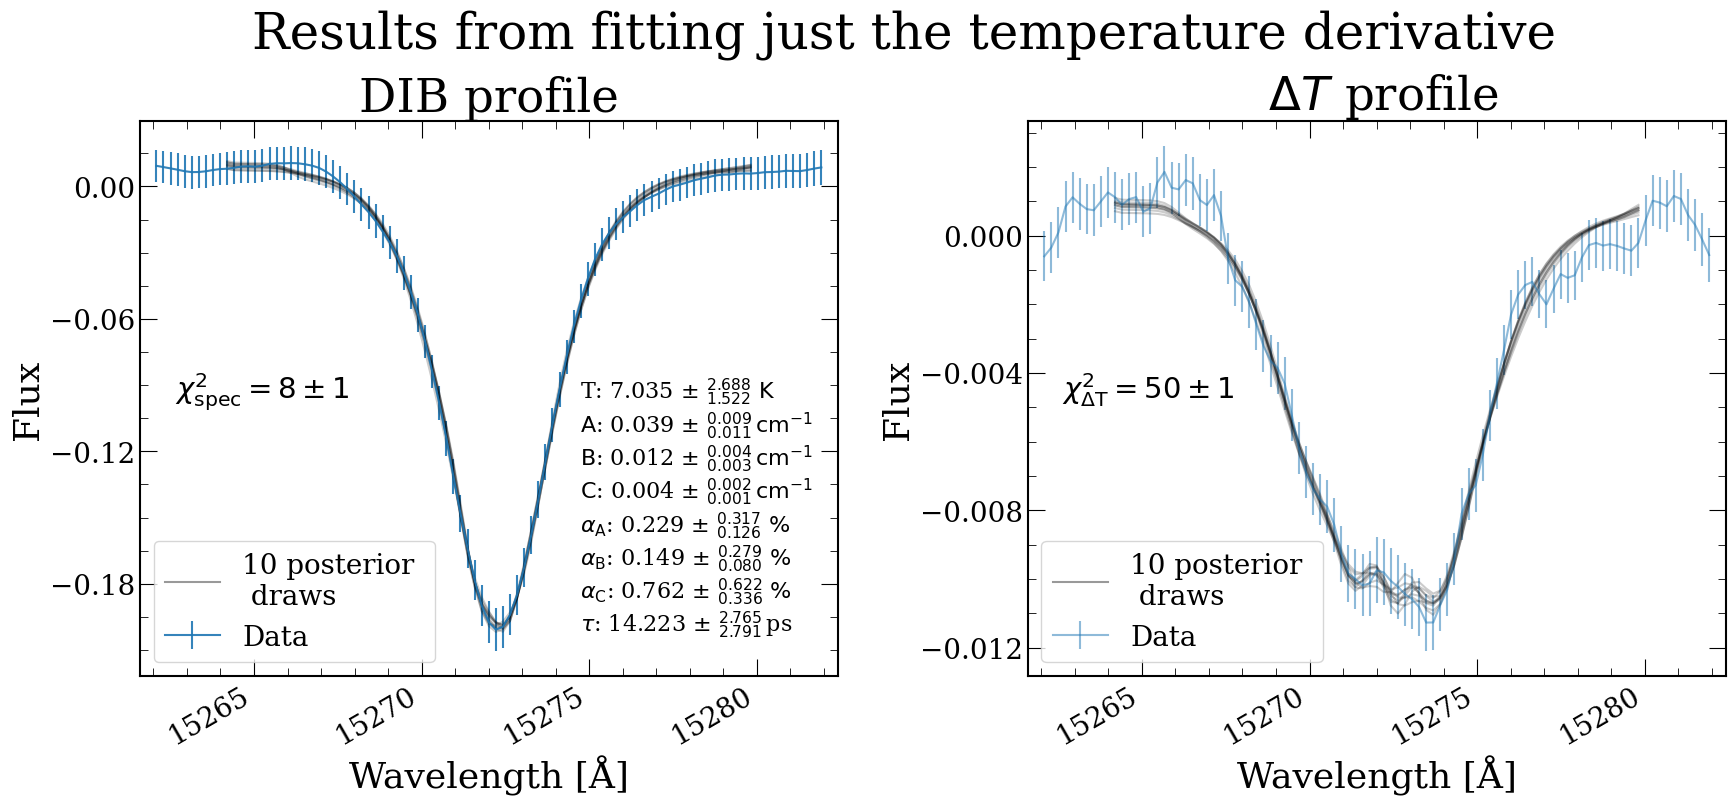

In [94]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.facecolor"] = "white"
plt.rc("text", usetex=False)
plt.rc("font", family="serif",size= 28)
plt.rc("axes", linewidth=1.5)
plt.rc("axes", labelsize=26)
plt.rc("xtick", labelsize=20, direction="in")
plt.rc("ytick", labelsize=20, direction="in")
plt.rc("xtick", top=True)
plt.rc("ytick", right=True)
plt.rc("xtick.minor", visible=True)
plt.rc("ytick.minor", visible=True)
plt.rc("xtick.major",size=12, pad=4)
plt.rc("xtick.minor",size=6, pad=4)
plt.rc("ytick.major",size=12)
plt.rc("ytick.minor",size=6)
plt.rc("legend", fontsize=20)

plt.close('all')
fig, axs = plt.subplots(ncols = 2, figsize= (18,9))
c = 10
# c = 30

print(filename)

dwav = -0.5
xlim = (data_wavelength[0]+dwav, data_wavelength[-1]-dwav)
n_yticks = n_xticks = 5
legend_location = 'lower left'
alpha_post = 0.2

chi2 = ( (posterior_spectra.T-data_flux[c:-c].reshape(-1, 1) )/noise_std[c:-c].reshape(-1, 1))**2
chi2 = np.sum(chi2, axis = 0)

Ntop = 10

DIB_label = ''
posterior_label = f'{Ntop} posterior \n draws'

# indices of the N smallest values
idx = np.argpartition(chi2, Ntop)[:Ntop]
# if you want them sorted by value
spec_min_idx = idx[np.argsort(chi2[idx])]

chi2_dT = ( (posterior_dT.T-data_flux_dT[c:-c].reshape(-1, 1) )/noise_std_dT[c:-c].reshape(-1, 1))**2
chi2_dT = np.sum(chi2_dT, axis = 0)
# indices of the N smallest values
idx = np.argpartition(chi2_dT, Ntop)[:Ntop]
# if you want them sorted by value
dT_min_idx = idx[np.argsort(chi2_dT[idx])]

axs[0].errorbar(data_wavelength, data_flux, yerr = noise_std, alpha = 0.9, label = 'Data')
axs[0].plot(data_wavelength[c:-c], posterior_spectra.T[:, spec_min_idx], 'k-', alpha = alpha_post)
axs[0].plot(data_wavelength[c:-c]-100, posterior_spectra[0], 'k-', alpha = 2*alpha_post, label = posterior_label)

axs[0].set(xlabel = 'Wavelength [Å]', ylabel = 'Flux', title = 'DIB profile', xlim = xlim )
axs[0].legend(loc = legend_location)

axs[1].errorbar(data_wavelength, data_flux_dT, yerr = noise_std_dT, alpha = 0.5, label = 'Data')
axs[1].plot(data_wavelength[c:-c], posterior_dT.T[:, dT_min_idx], 'k-', alpha = alpha_post)
axs[1].plot(data_wavelength[c:-c]-100, posterior_dT[0], 'k-', alpha = 2*alpha_post, label = posterior_label)
axs[1].set(xlabel = 'Wavelength [Å]', ylabel = 'Flux', title = r' $\Delta T$ profile', xlim = xlim )
axs[1].legend(loc = legend_location)

plt.setp(axs[0].get_xticklabels(), rotation=30, horizontalalignment='right')
plt.setp(axs[1].get_xticklabels(), rotation=30, horizontalalignment='right')

axs[0].xaxis.set_major_locator(plt.MaxNLocator(n_xticks))
axs[1].xaxis.set_major_locator(plt.MaxNLocator(n_xticks))

axs[0].yaxis.set_major_locator(plt.MaxNLocator(n_yticks))
axs[1].yaxis.set_major_locator(plt.MaxNLocator(n_yticks))

labels = [r'$\tau$', r'$\alpha_{\mathrm{C}}$', r'$\alpha_{\mathrm{B}}$', r'$\alpha_{\mathrm{A}}$', r'$\mathrm{C}$', r'$\mathrm{B}$', r'$\mathrm{A}$', 'T']
units = ['$~\mathrm{K}$']+[r'$\,\mathrm{cm}^{-1}$']*3+[r'$~\%$']*3

x0, y0 = 0.63, 0.5
dy = 0.06
for i, l in enumerate(labels[::-1]):
    
    s = np.copy(samples[inds,i])
    if i ==0:
        s*=T_fac        
    if i>3 and i<7:
        s = (1-s)/2
        s*=100
    if i==7:
        s *= 2.998e10 # from inv cm to Hz
        s = 1/(2*np.pi*s)

        if np.median(s)>1e-10:
            s *=1e9
            units += [r'$\,$ns']
        else:
            s *=1e12
            units += [r'$\,$ps']
    med = np.median(s)
    uperr = np.percentile(s, 84)-med
    downerr = med - np.percentile(s, 16)
    text = fr"{l}: {med:.3f} $\pm$ $^{{{uperr:.3f}}}_{{{downerr:.3f}}}$"+units[i]
    axs[0].annotate(text, xy = (x0, y0-i*dy), xycoords = 'axes fraction', fontsize = 16)

# labels = [r'$\tau$', r'$\alpha_{\mathrm{BC}}$', r'$\alpha_{\mathrm{A}}$', r'$\mathrm{BC}$', r'$\mathrm{A}$', 'T']
# units = ['$~\mathrm{K}$']+[r'$\,\mathrm{cm}^{-1}$']*2+[r'$~\%$']*2
# for i, l in enumerate(labels[::-1]):
    
#     s = np.copy(samples[inds,i])
#     if i ==0:
#         s*=T_fac        
#     if i>2 and i<5:
#         s = (1-s)/2
#         s*=100
#     if i==5:
#         s *= 2.998e10 # from inv cm to Hz
#         s = 1/(2*np.pi*s)

#         if np.median(s)>1e-10:
#             s *=1e9
#             units += [r'$\,$ns']
#         else:
#             s *=1e12
#             units += [r'$\,$ps']
#     med = np.median(s)
#     uperr = np.percentile(s, 84)-med
#     downerr = med - np.percentile(s, 16)
#     text = fr"{l}: {med:.3f} $\pm$ $^{{{uperr:.3f}}}_{{{downerr:.3f}}}$"+units[i]
#     axs[0].annotate(text, xy = (x0, y0-i*dy), xycoords = 'axes fraction', fontsize = 16)

x0, y0 = 0.7, 0.47
dx = 0.06
dy = 0.065
# i = 4.5
# axs[1].annotate(fr'$\frac{{df}}{{dR(V)}} = {np.mean(dDIBdRV):.2f} \pm {np.std(dDIBdRV)/np.sqrt(len(dDIBdRV)):.2f}$', xy = (x0-dx, y0-i*dy), xycoords = 'axes fraction', fontsize = 19)
# i = 6
# axs[1].annotate(fr'$\frac{{dT}}{{dR(V)}} = {np.mean(beta_prime):.0f} \pm {np.std(beta_prime)/1:.0f}\,\mathrm{{K}}$', xy = (x0-dx, y0-i*dy), xycoords = 'axes fraction', fontsize = 19)


x0, y0 = 0.05, 0.5
dy = 0.09
fs = 21
annotate_total= False

divf = np.sqrt(len(chi2))
divf = 1
chi2 = chi2[spec_min_idx]
chi2_dT = chi2_dT[dT_min_idx]
axs[0].annotate(fr'$\chi^2_{{\mathrm{{spec}}}} = {np.mean(chi2):.0f} \pm {np.std(chi2)/divf:.0f}$', xy = (x0, y0),\
                xycoords = 'axes fraction', fontsize = fs)
if annotate_total:
    axs[0].annotate(fr'$\chi^2_{{\mathrm{{tot}}}} = {np.mean(chi2+chi2_dT):.0f} \pm {np.std(chi2+chi2_dT)/divf:.0f}$', xy = (x0, y0-dy),\
                    xycoords = 'axes fraction', fontsize = fs)

axs[1].annotate(fr'$\chi^2_{{\mathrm{{\Delta T}}}} = {np.mean(chi2_dT):.0f} \pm {np.std(chi2_dT)/divf:.0f}$', xy = (x0, y0),\
                xycoords = 'axes fraction', fontsize = fs)
if annotate_total:
    axs[1].annotate(fr'$\chi^2_{{\mathrm{{tot}}}} = {np.mean(chi2+chi2_dT):.0f} \pm {np.std(chi2+chi2_dT)/divf:.0f}$', xy = (x0, y0-dy),\
                    xycoords = 'axes fraction', fontsize = fs)


title_add = ''
if args.fit_spec:
    title_add += 'the DIB profile'
    if args.fit_dT:
        title_add += ' AND the temperature derivative'
    else:
        title_add = 'just ' + title_add
if args.fit_dT and not args.fit_spec:
    title_add += 'just the temperature derivative'
    
fig.suptitle(f'Results from fitting {title_add}', y = 0.92, x = 0.52, fontsize = 36)

fig.tight_layout()
name = ''
if args.fit_spec:
    name += '_spec'
if args.fit_dT:
    name+='_dT'
    
# fig.savefig(f'figs/data_and_model{name}.png', dpi = 200, bbox_inches = 'tight')

fig

In [93]:
# from matplotlib.ticker import LogLocator, FuncFormatter
# mpl.rcParams.update(mpl.rcParamsDefault)
# plt.rcParams["figure.facecolor"] = "white"
# plt.rc("text", usetex=False)
# plt.rc("font", family="serif",size= 17)
# plt.rc("axes", linewidth=1.5)
# plt.rc("axes", labelsize=22)
# plt.rc("xtick", labelsize=16, direction="in")
# plt.rc("ytick", labelsize=16, direction="in")
# plt.rc("xtick", top=True)
# plt.rc("ytick", right=True)
# plt.rc("xtick.minor", visible=True)
# plt.rc("ytick.minor", visible=True)
# plt.rc("xtick.major",size=10, pad=6)
# plt.rc("xtick.minor",size=4, pad=6)
# plt.rc("ytick.major",size=10)
# plt.rc("ytick.minor",size=4)
# plt.rc("legend", fontsize=20)

# # samples_ext = samples[samples[:,0]>10]
# # samples = np.vstack([samples, samples_ext, samples_ext, samples_ext])
# print(f"Samples shape: {samples.shape}")

# labels = [r'$\alpha_{\mathrm{C}}$', r'$\alpha_{\mathrm{B}}$', r'$\alpha_{\mathrm{A}}$', r'$\mathrm{C}$', r'$\mathrm{B}$', r'$\mathrm{A}$', 'T']
# # Corner plot

# samples0 = np.copy(samples)
# samples0[:,[4,5,6]] = (1-samples0[:,[4,5,6]])/2*100
# axes_scale = ['log']+6*['linear']
# # axes_scale = 7*['linear']

# fig, axs = plt.subplots(7, 7, figsize = ( 18, 18 )) 

# fig = corner.corner(
#     samples0,
#     labels=labels[::-1],
#     bins = 25,
#     axes_scale = axes_scale,
#     show_titles=True,
#     smooth = 1,
#     quantiles=[0.16, 0.5, 0.84],
#     title_fmt=".3f",
#     range = [0.999999]*len(labels),
#     use_math_text = True,
#     labelpad = 0.02,
#     fig = fig
# )

# # for ax in fig.get_axes():
# #     for label in ax.get_xticklabels():
# #         label.set_rotation(10)



# # Target the correct axis (here, axis #6, which is the bottom-left corner for param 0)
# ax = fig.axes[-7]

# # Choose your desired tick positions in linear space
# if args.fit_spec:
#     tick_positions = [3, 4, 6, 10, 17]
#     if args.fit_dT:
#         tick_positions = [3, 4, 6, 10, 13]    
        
# if args.fit_dT and not args.fit_spec:
#     tick_positions = [4, 10, 20, 40]    
    
# # Apply to log-scaled axis using LogLocator and manually set labels
# ax.set_xticks(tick_positions)
# ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, _: f"{x:g}"))

# fig.suptitle(f'Results from fitting \n {title_add}', y = 0.92, x = 0.65, fontsize = 32)

# plt.draw()
# name = ''
# if args.fit_spec:
#     name += '_spec'
# if args.fit_dT:
#     name+='_dT'
# fig.savefig(f'figs/emcee{name}.png', dpi = 200, bbox_inches = 'tight')
# fig

In [94]:
# list_fits = os.listdir('temp_outputs')
# list_fits = [l[-9:-4] for l in list_fits]

# idx = 10

# spec = np.loadtxt(f'temp_outputs/fit_spec_{list_fits[idx]}.csv')
# spec, specb, specc, dT, dTb, dTc = spec
# # specb = np.loadtxt(f'temp_outputs/specb_{list_fits[idx]}.csv')
# # specc = np.loadtxt(f'temp_outputs/specc_{list_fits[idx]}.csv')
# # dT = np.loadtxt(f'temp_outputs/fit_dt_{list_fits[idx]}.csv')

# fig, axs = plt.subplots(ncols = 2, figsize = (12,6))
# c = 10
# axs[0].plot(specb)

# axs[0].plot(specc)
# axs[0].plot(spec)
# axs[0].plot(data_flux[c:-c])

# axs[1].plot(dT)
# axs[1].plot(dTb)
# axs[1].plot(dTc)
# axs[1].plot(data_flux_dT[c:-c])